# Задание 1

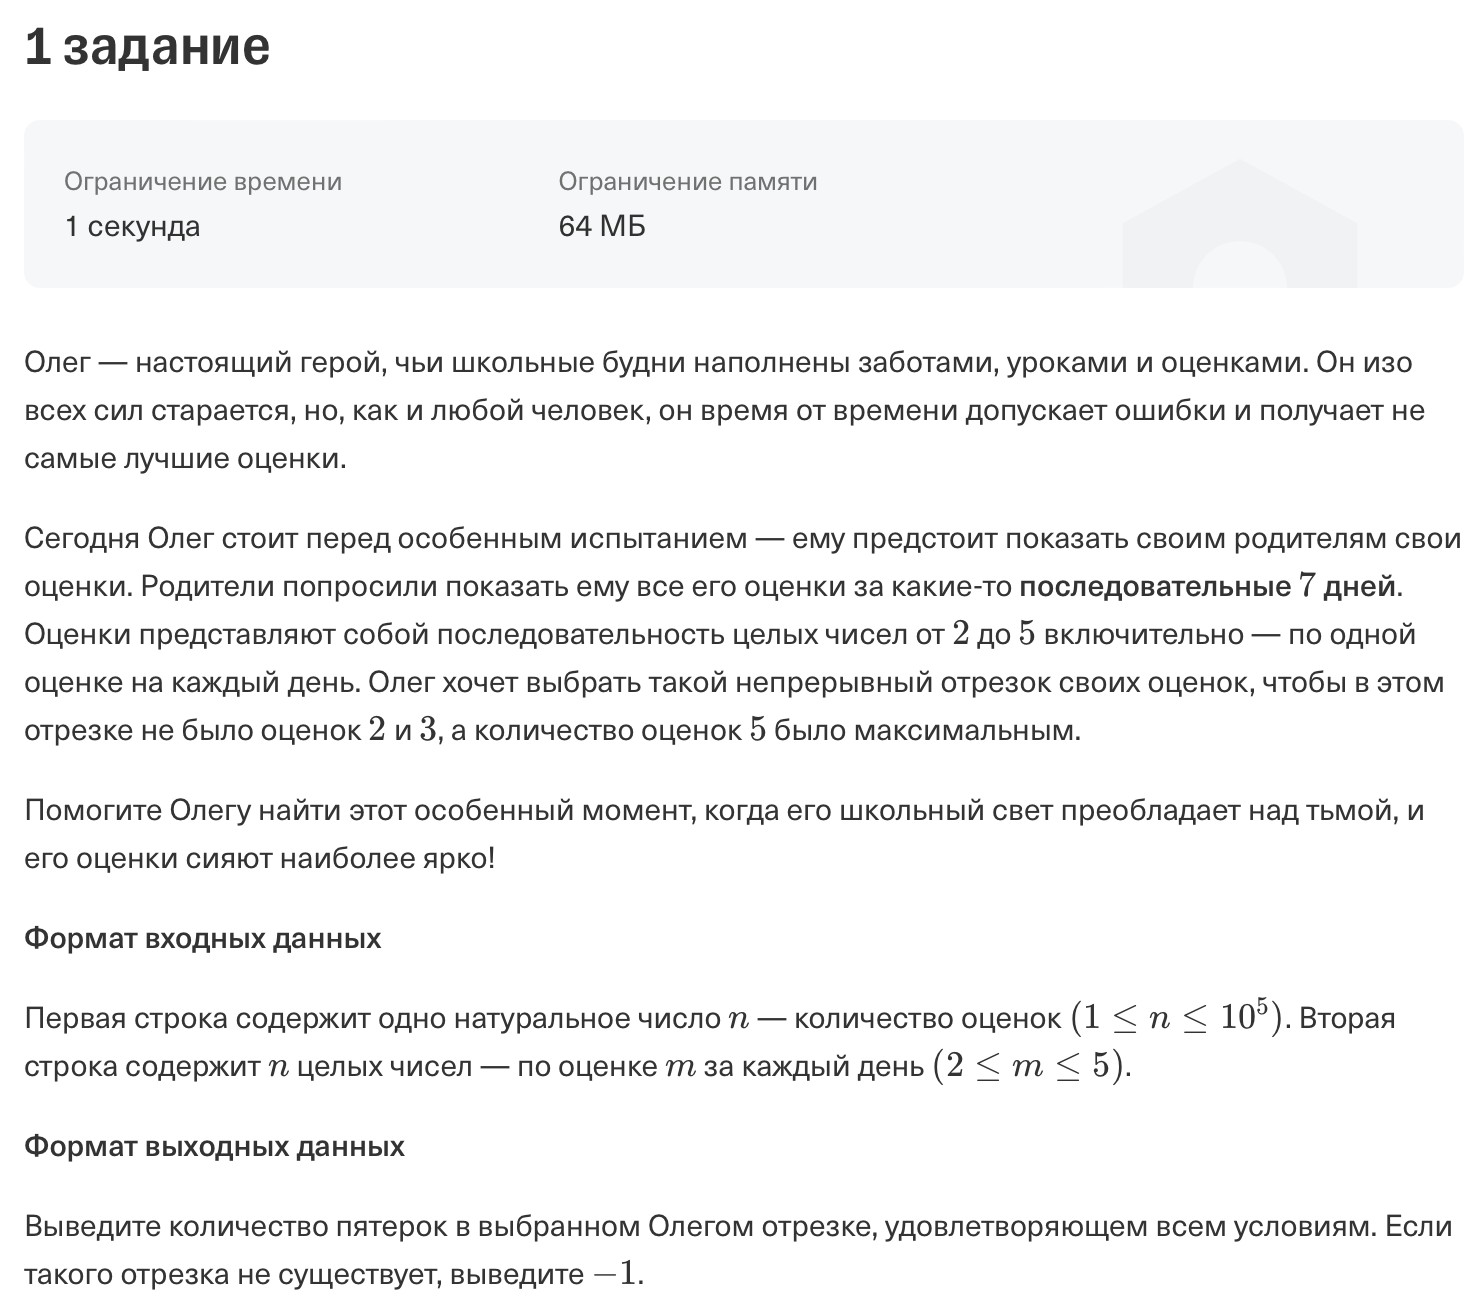

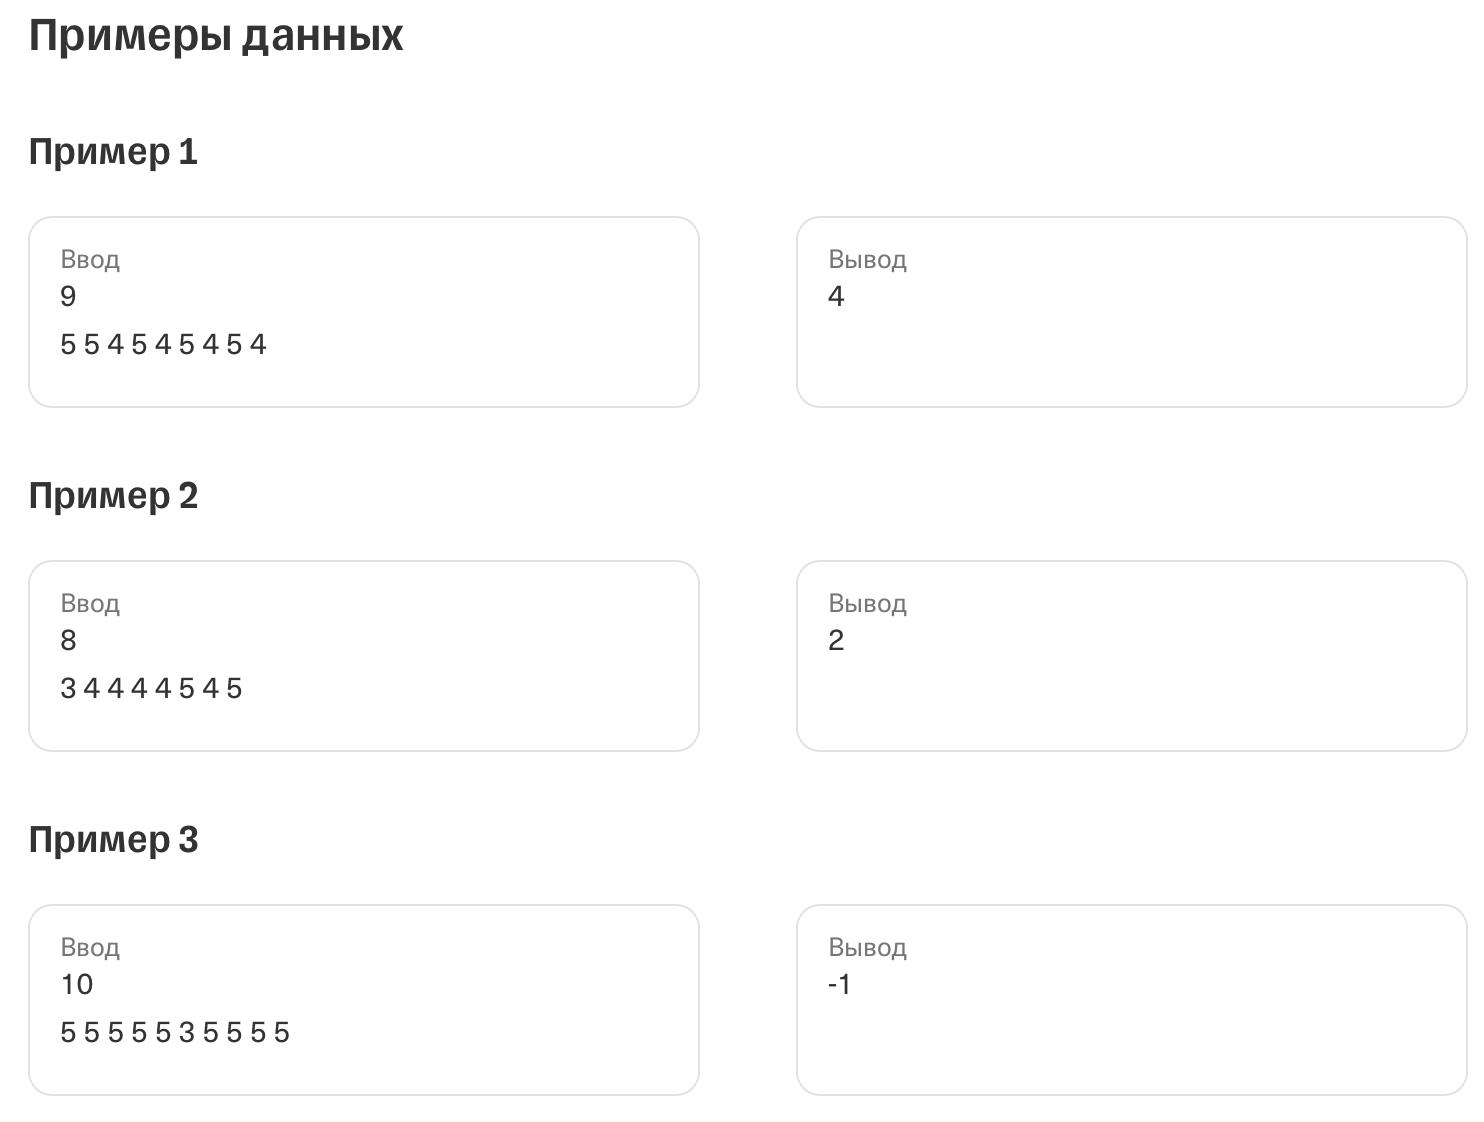

In [182]:
count = int(input())
marks_str = input().split()

marks = [int(m) for m in marks_str]

max_5 = -1

for i in range(count - 6):
    spline = marks[i:i+7]
    if 2 in spline or 3 in spline:
        continue
    else:
        temp_5 = sum(map(lambda x: x == 5, spline))
        max_5 = temp_5 if temp_5 > max_5 else max_5

if count < 7:
    if not (2 in marks or 3 in marks):
        max_5 = sum(map(lambda x: x == 5, marks))
    
print(max_5)

 10
 5 5 5 5 5 3 5 5 5 5


-1


# Задание 2

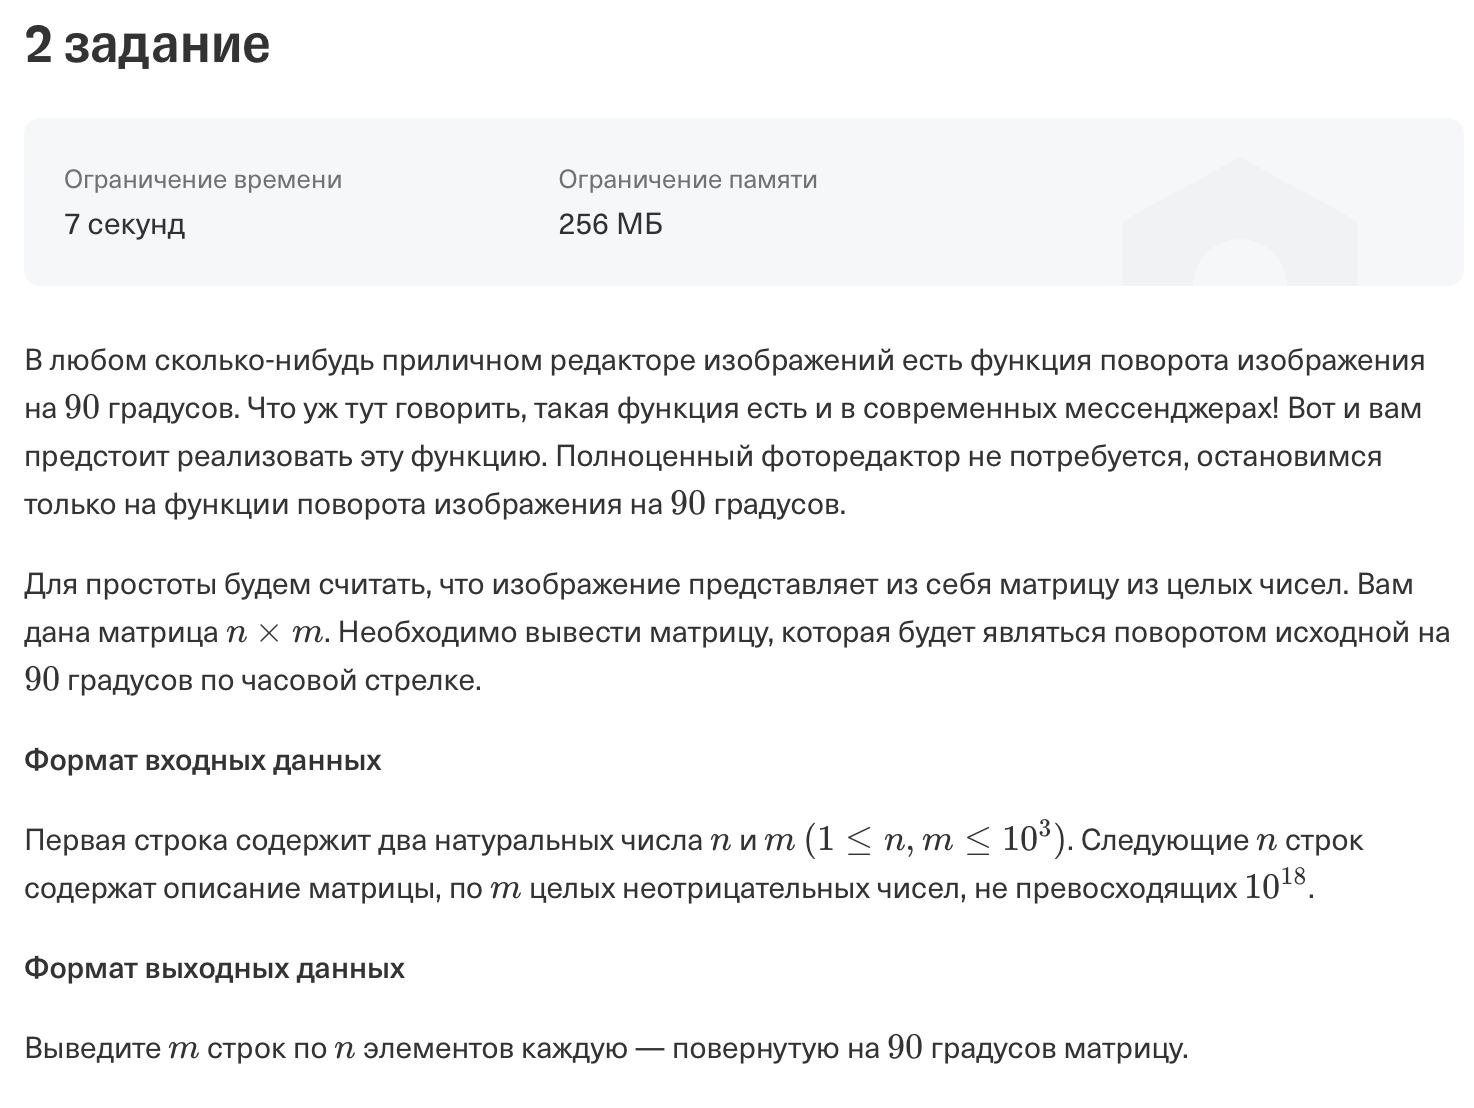

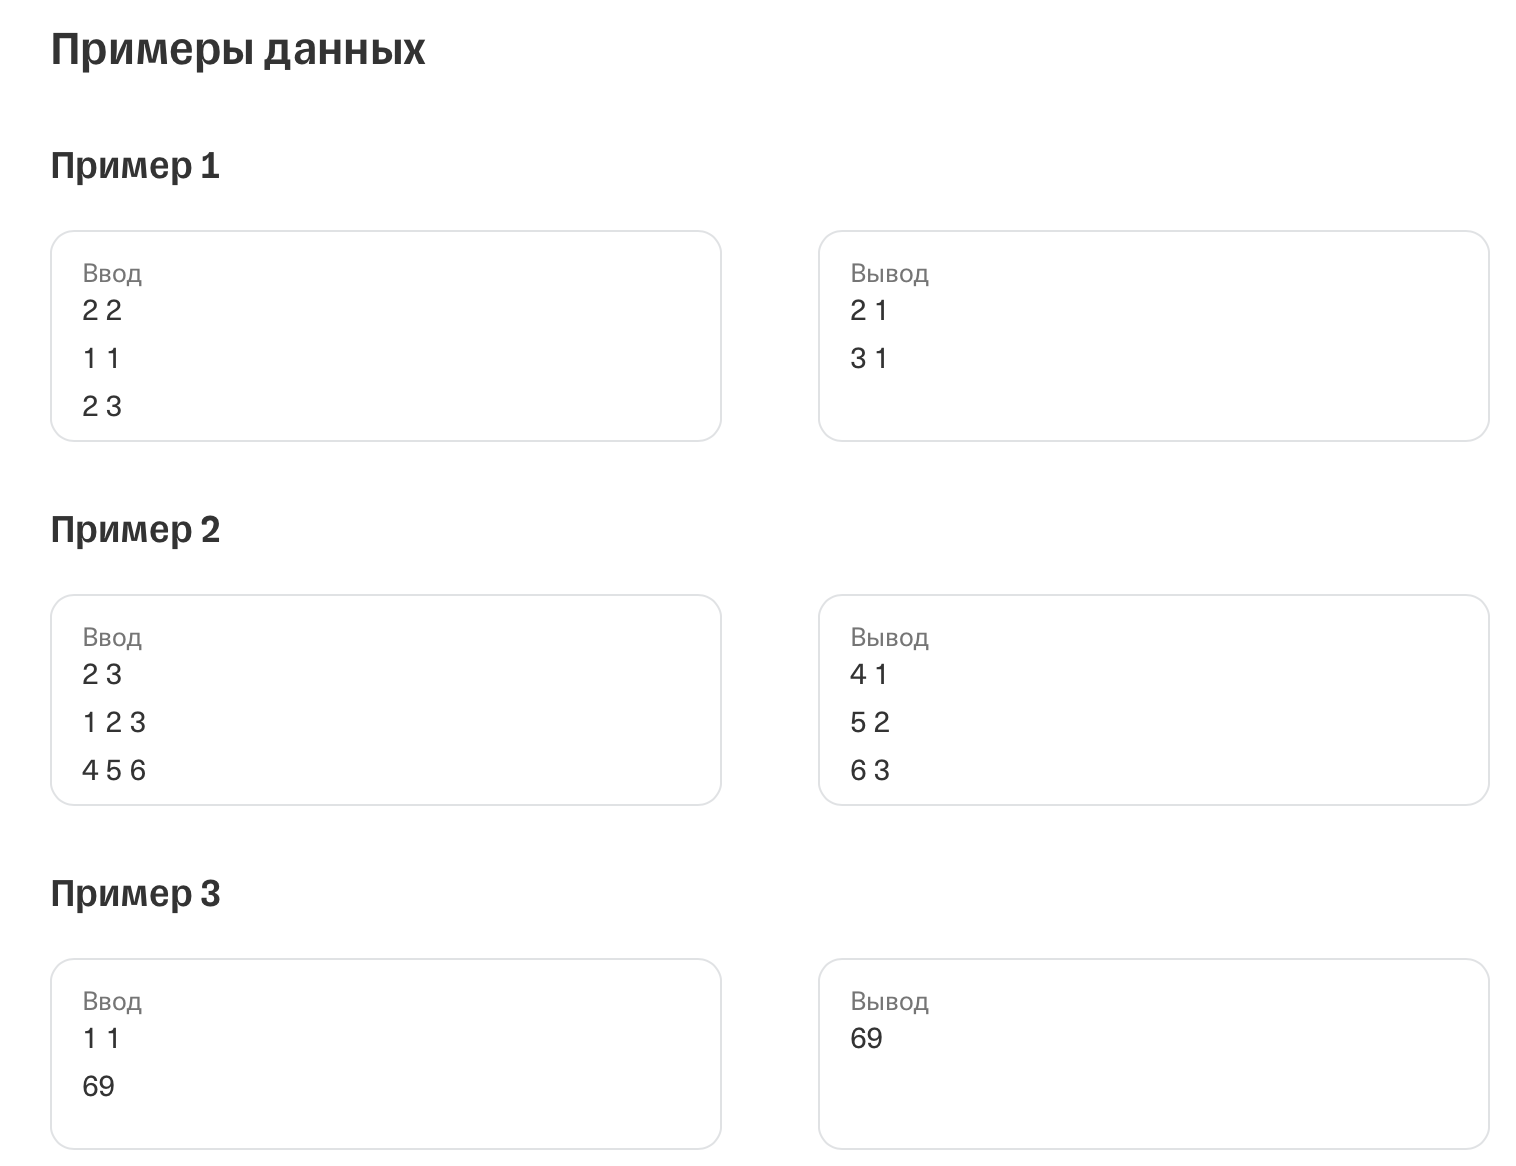

In [185]:
dim1, dim2 = [int(k) for k in input().split()]
m = [list() for i in range(dim2)]

for _ in range(dim1):
    row = input().split()
    for i, el in enumerate(row):
        m[i].append(el)

for row in m:
    print(' '.join(row[::-1]))

 3 5
 1 2 3 4 5
 6 7 8 9 0 
 16 27 38 49 50


16 6 1
27 7 2
38 8 3
49 9 4
50 0 5


# Задание 3

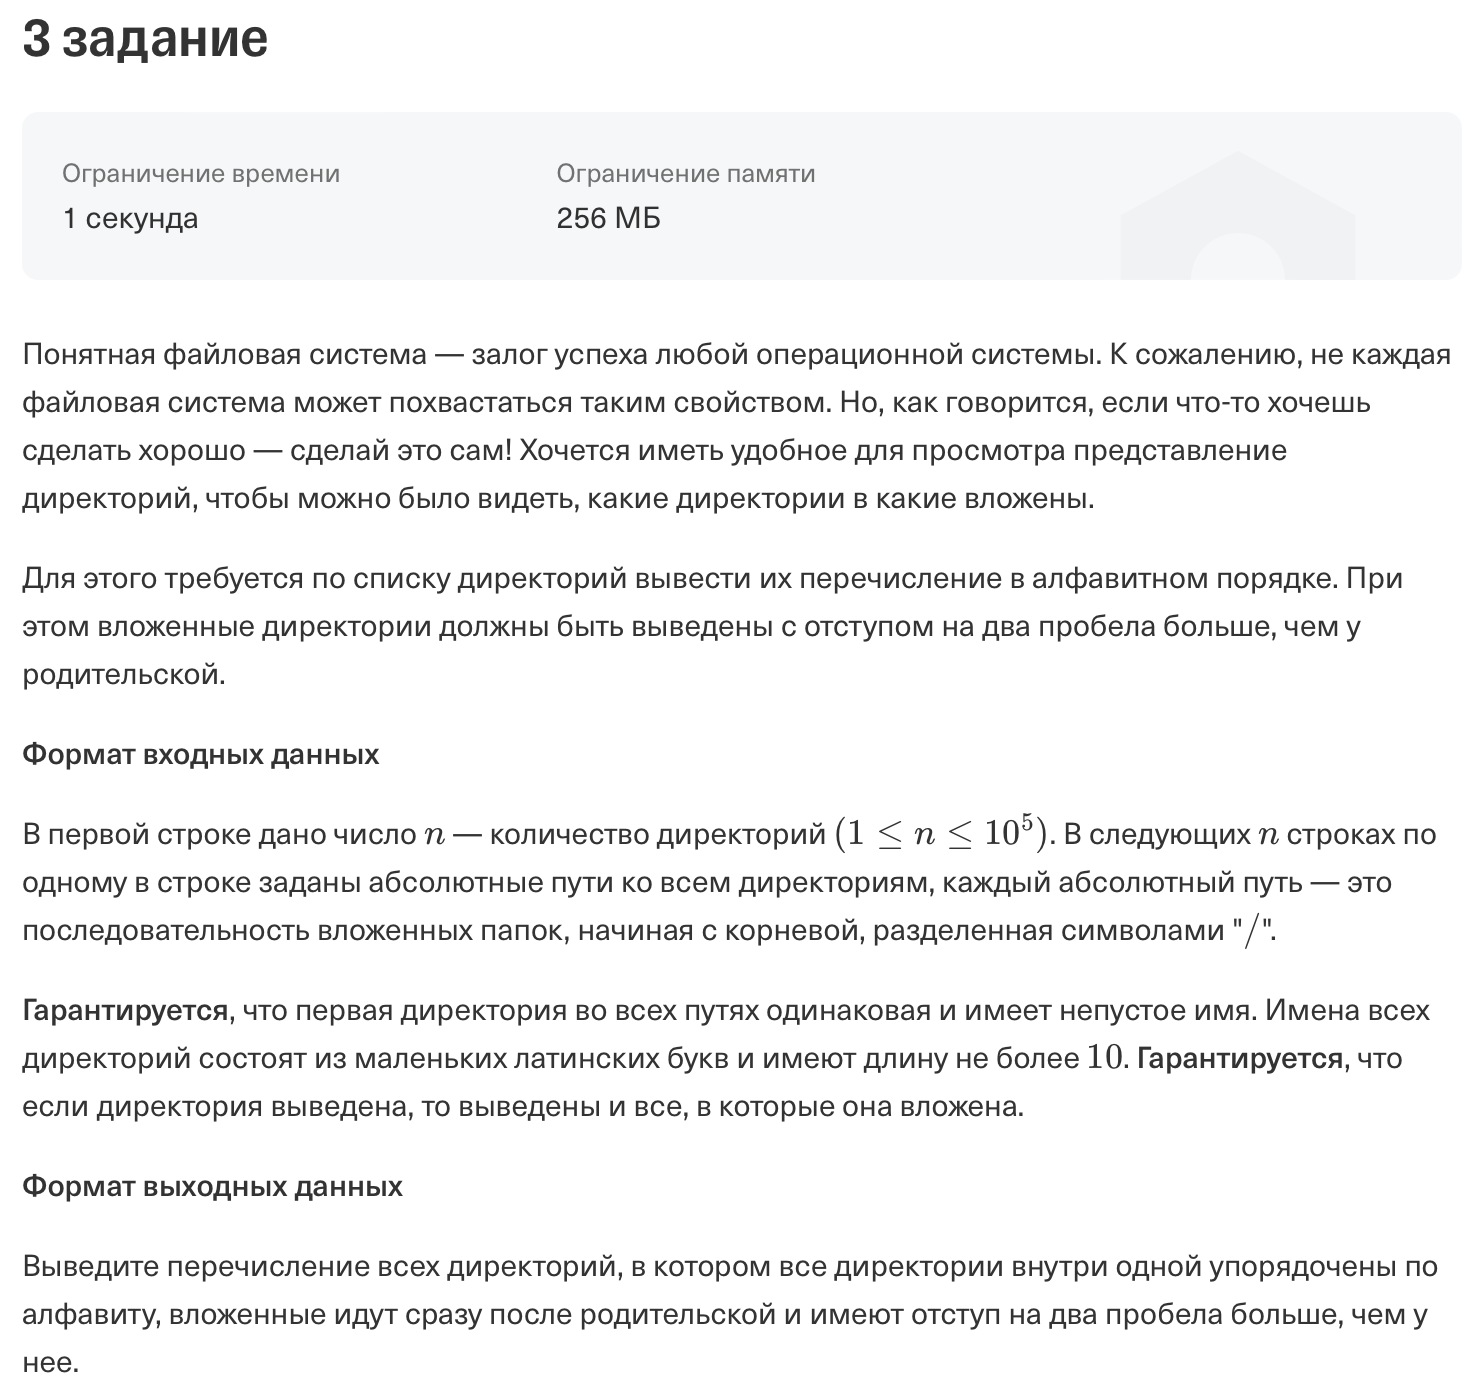

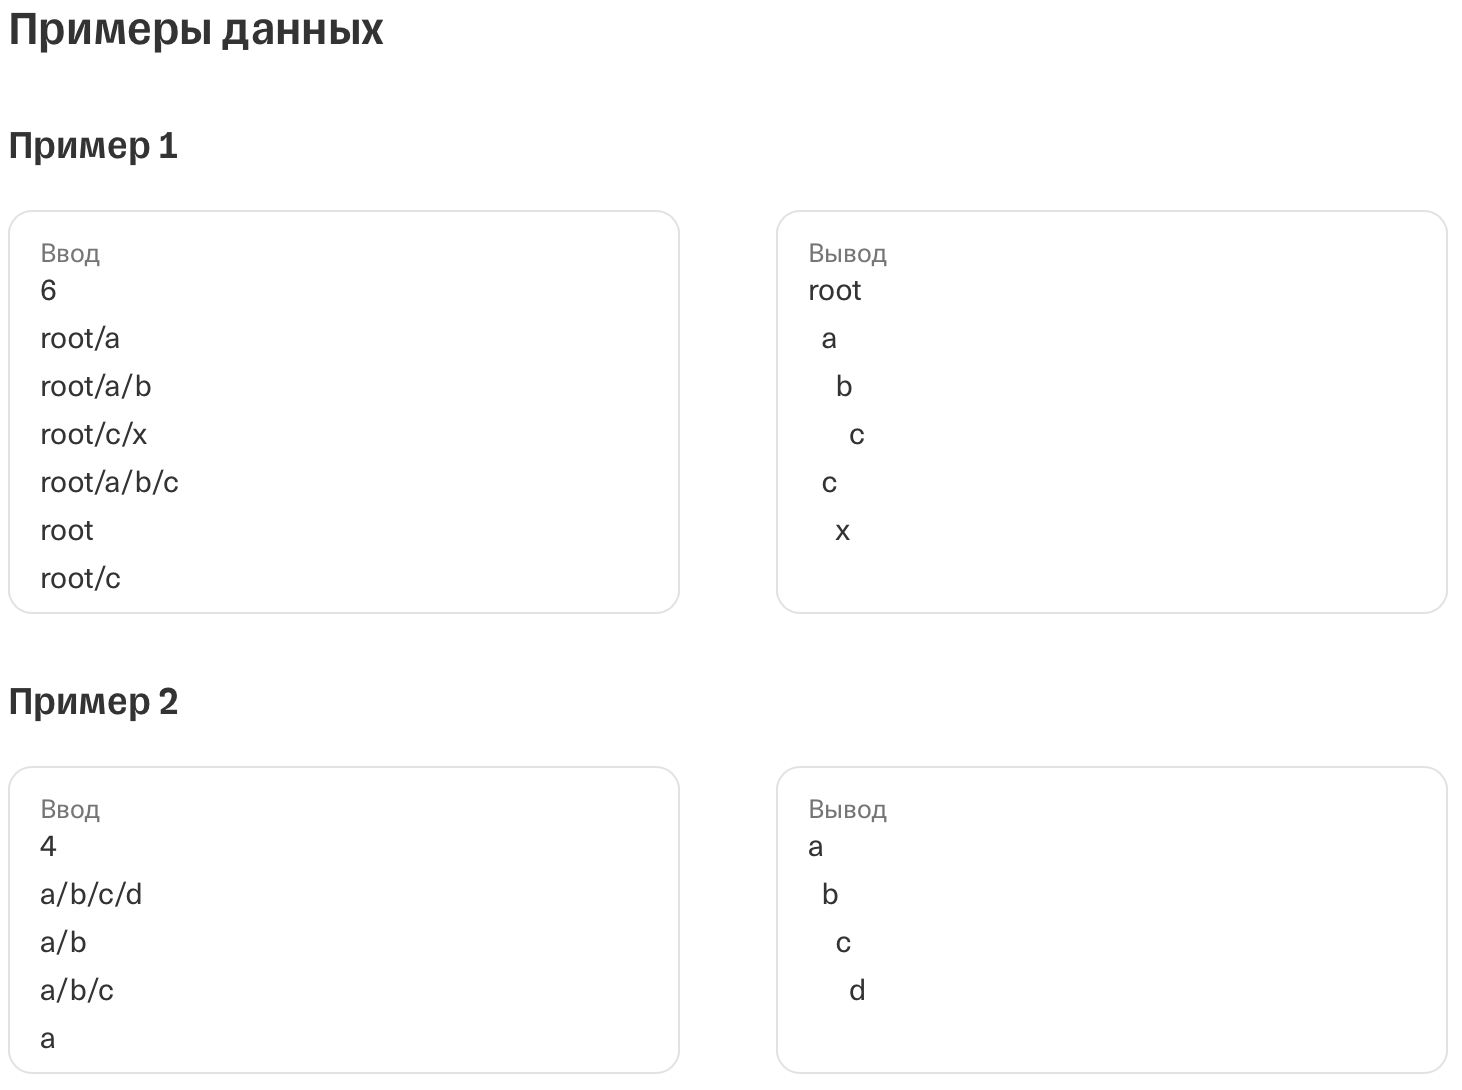

In [189]:
count = int(input())
dirs = sorted([input() for i in range(count)])

tabs = 0
curr_path = ['']
for name in dirs:
    while not name.startswith(curr_path[-1]):
        tabs -= 2  
        curr_path = curr_path[:-1]

    print(' ' * tabs + name[len(curr_path[-1]):].replace('/', ''))
    curr_path.append(name)
    tabs += 2


 7
 abc
 abc/vgh/bom
 abc/vgh
 dgce/abc
 dgce/jcob
 dgce
 dgce/jcob/bom


abc
  vgh
    bom
dgce
  abc
  jcob
    bom


In [ ]:
4
a/b/c/d
a/b
a/b/c
a

In [ ]:
root/a
root/a/b
root/c/x
root/a/b/c
root
root/c

# Задание 4

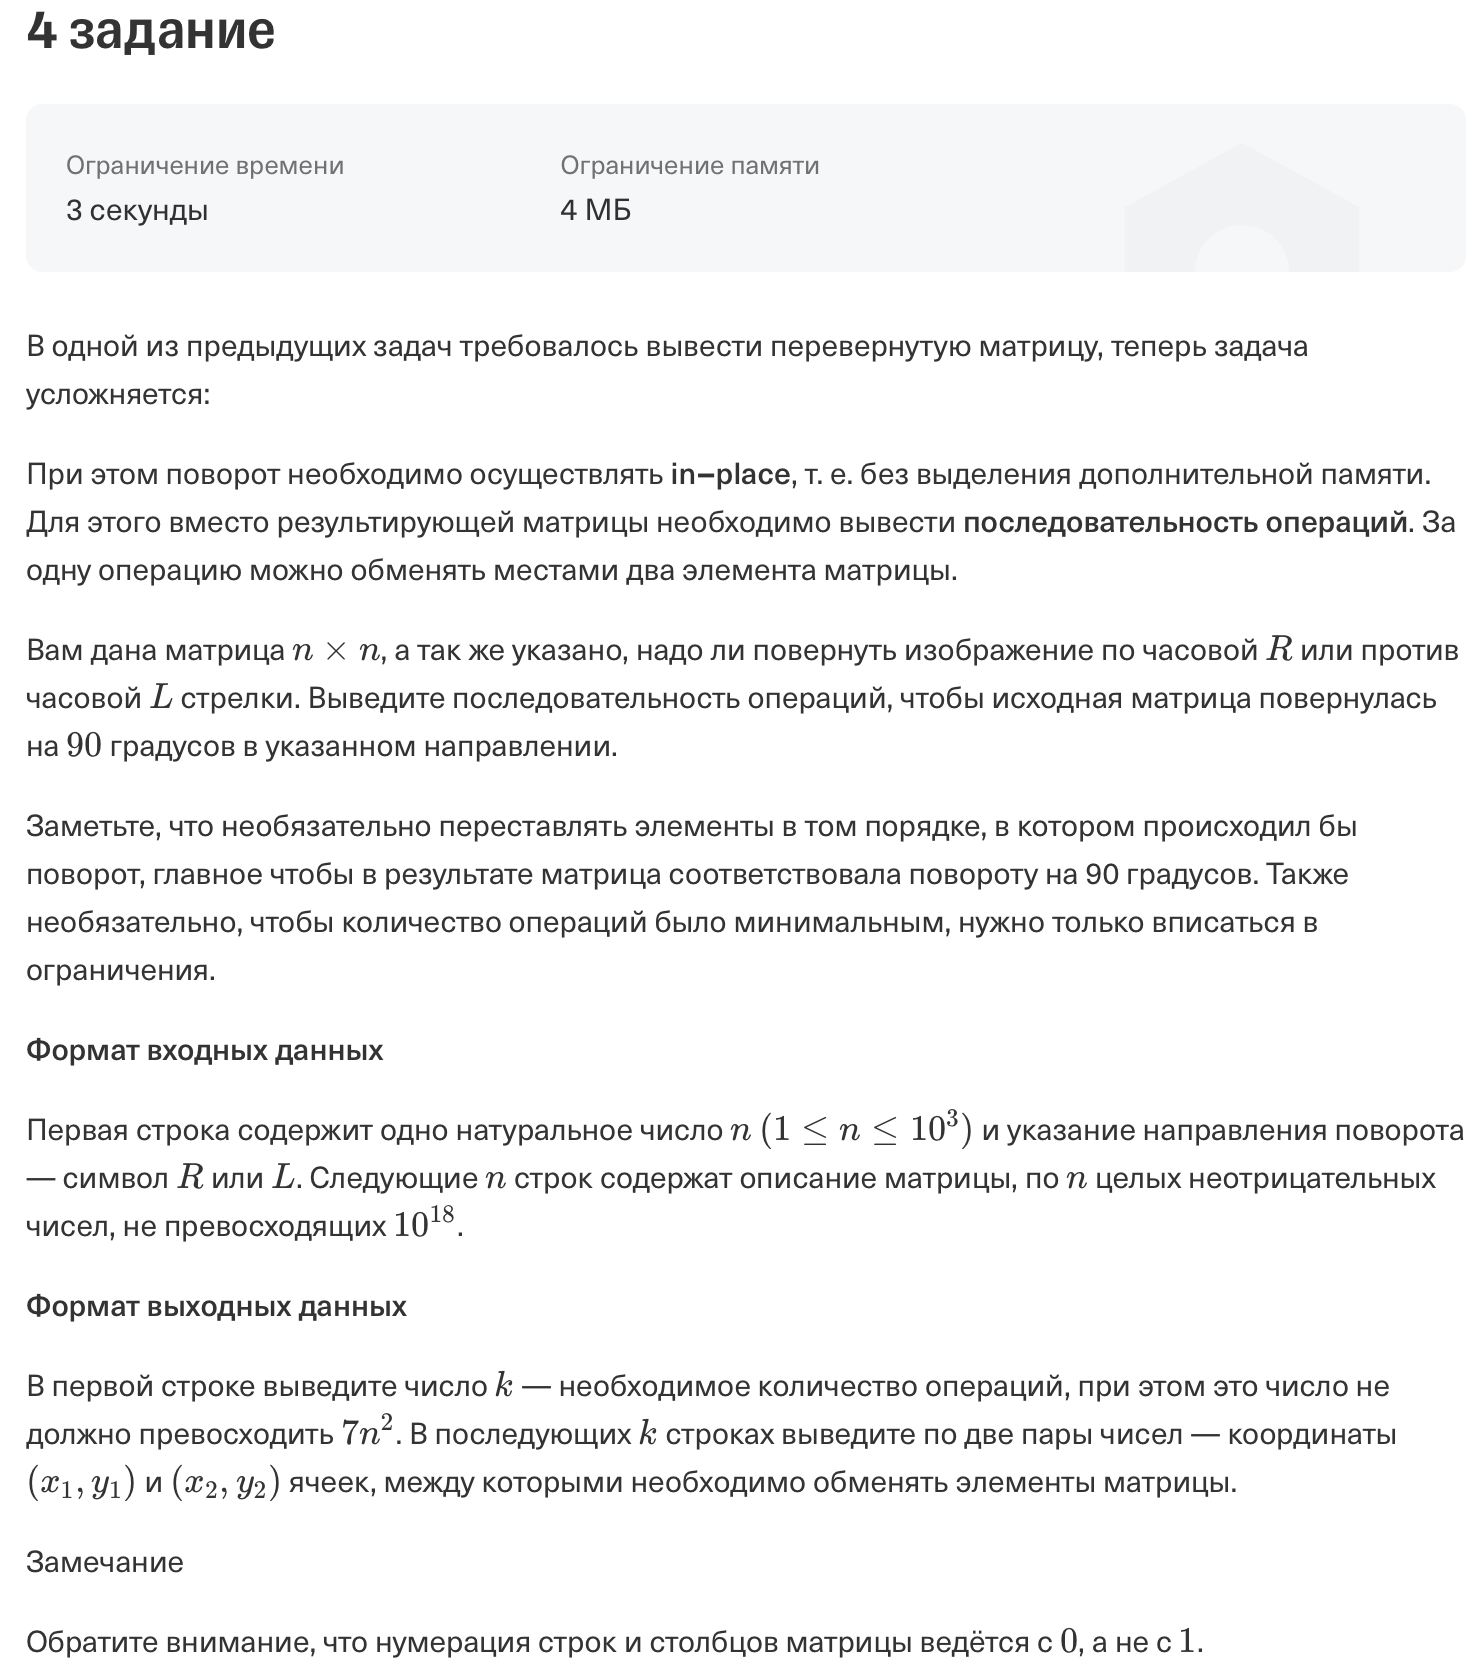

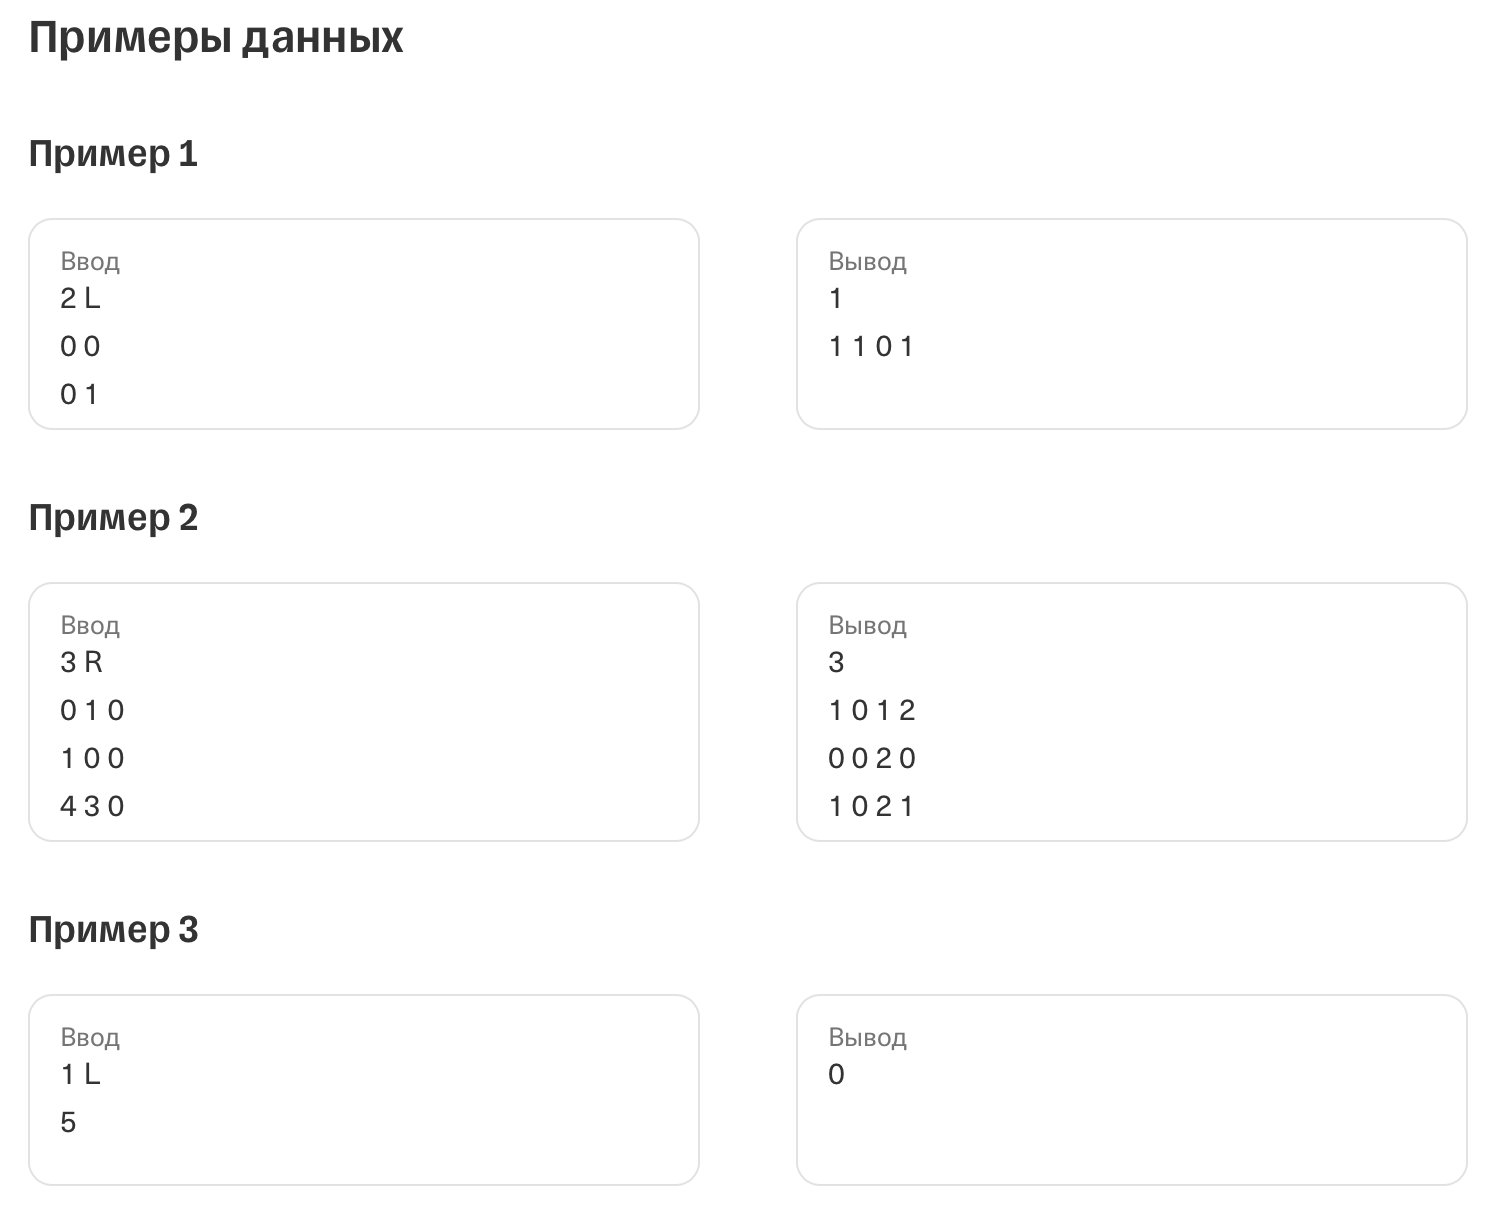

In [131]:
n, rot = input().split()
n = int(n)

m = [[int(k) for k in input().split()] for i in range(n)]
comands = []

# transpose
for i in range(0, n):
    for j in range(i, n):
        if m[i][j] != m[j][i]:
            comands.append(f'{i} {j} {j} {i}')
            
# swap rows or columns
if rot == 'L':
    for i in range(n // 2):
        for j in range(n):
            if m[j][i] != m[j][n-i-1]:
                comands.append(f'{i} {j} {n-i-1} {j}')
else:
    for i in range(n):
        for j in range(n // 2):
            if m[j][i] != m[n-j-1][i]:
                comands.append(f'{i} {j} {i} {n-j-1}')
print(len(comands))
for cmd in comands:
    print(cmd)

 3 R
 0 1 0
 1 0 0
 4 3 0


4
0 2 2 0
1 2 2 1
0 0 0 2
1 0 1 2


In [ ]:
3 R
0 1 0
1 0 0
4 3 0

# Задание 5

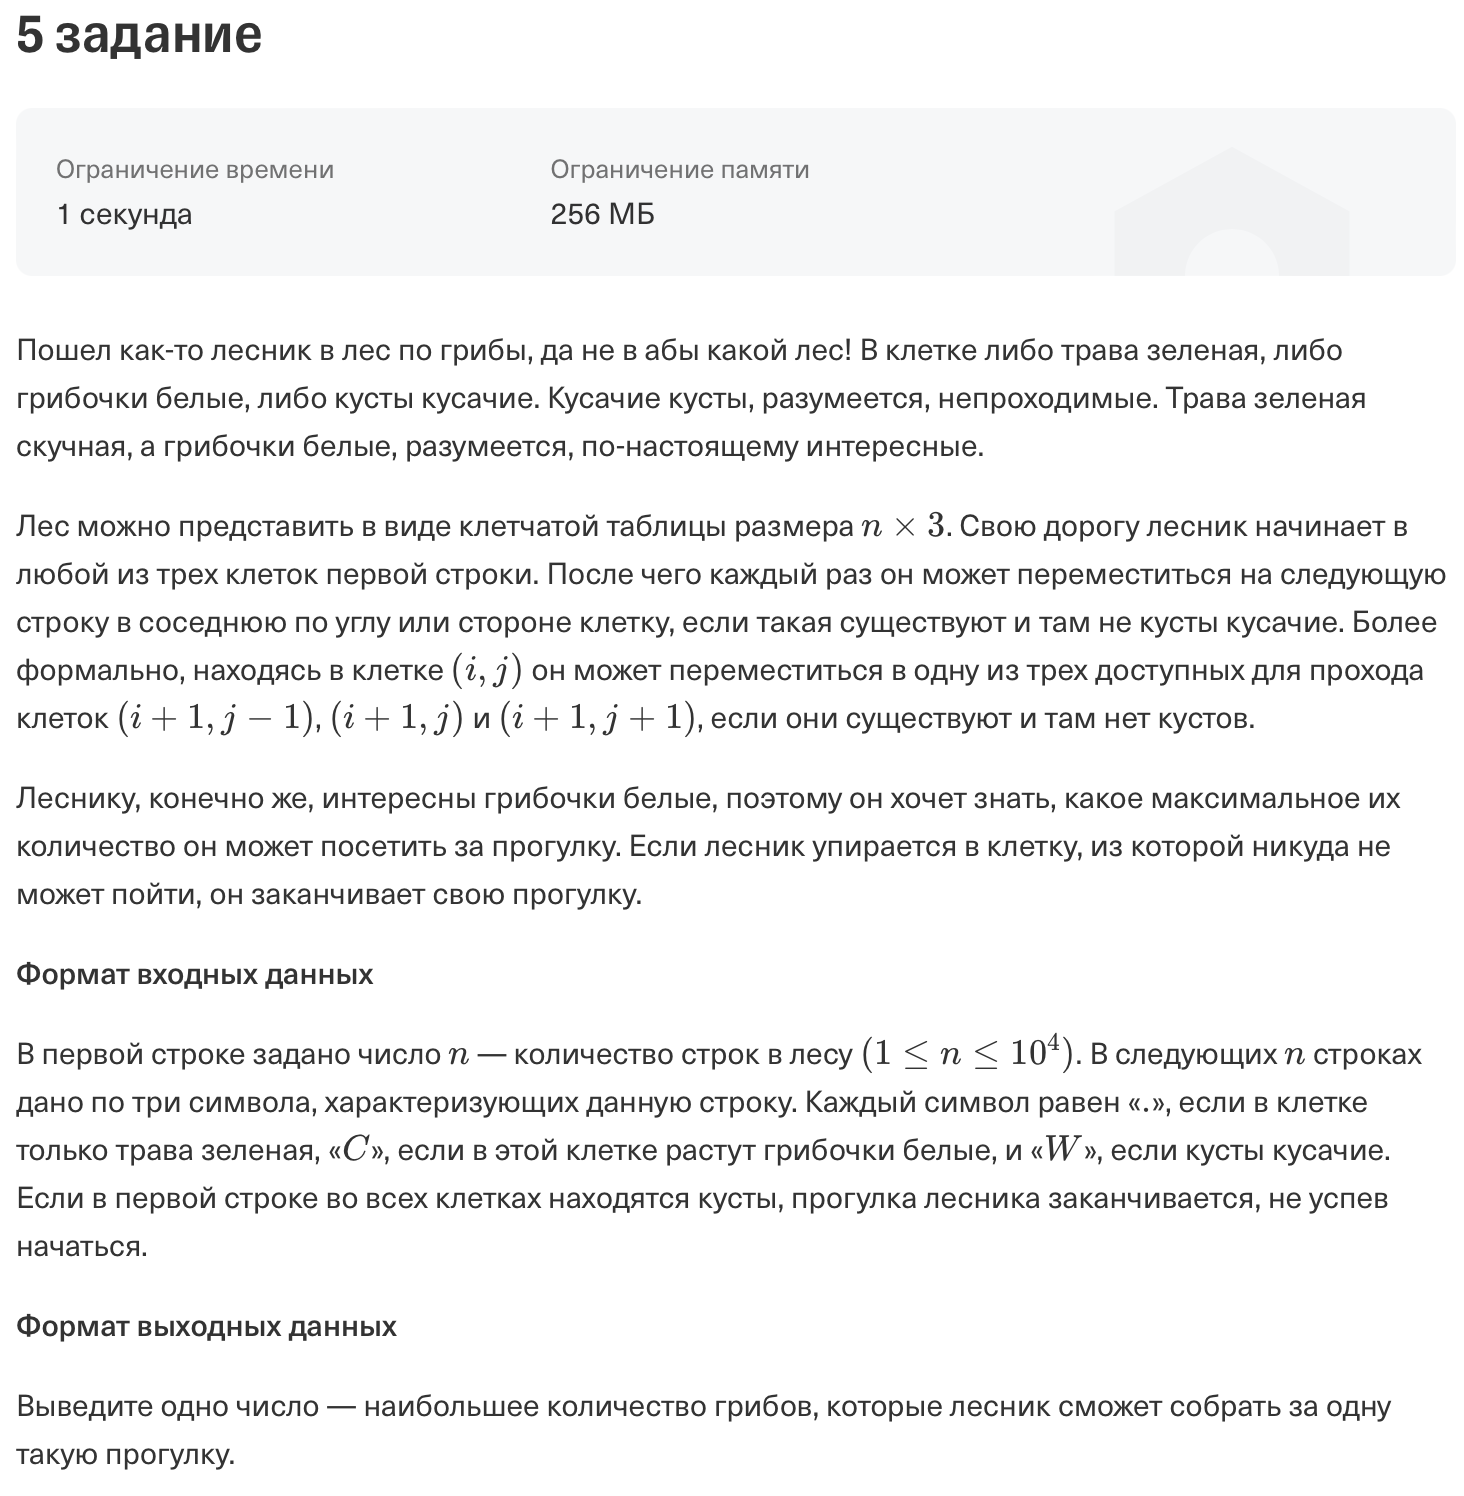

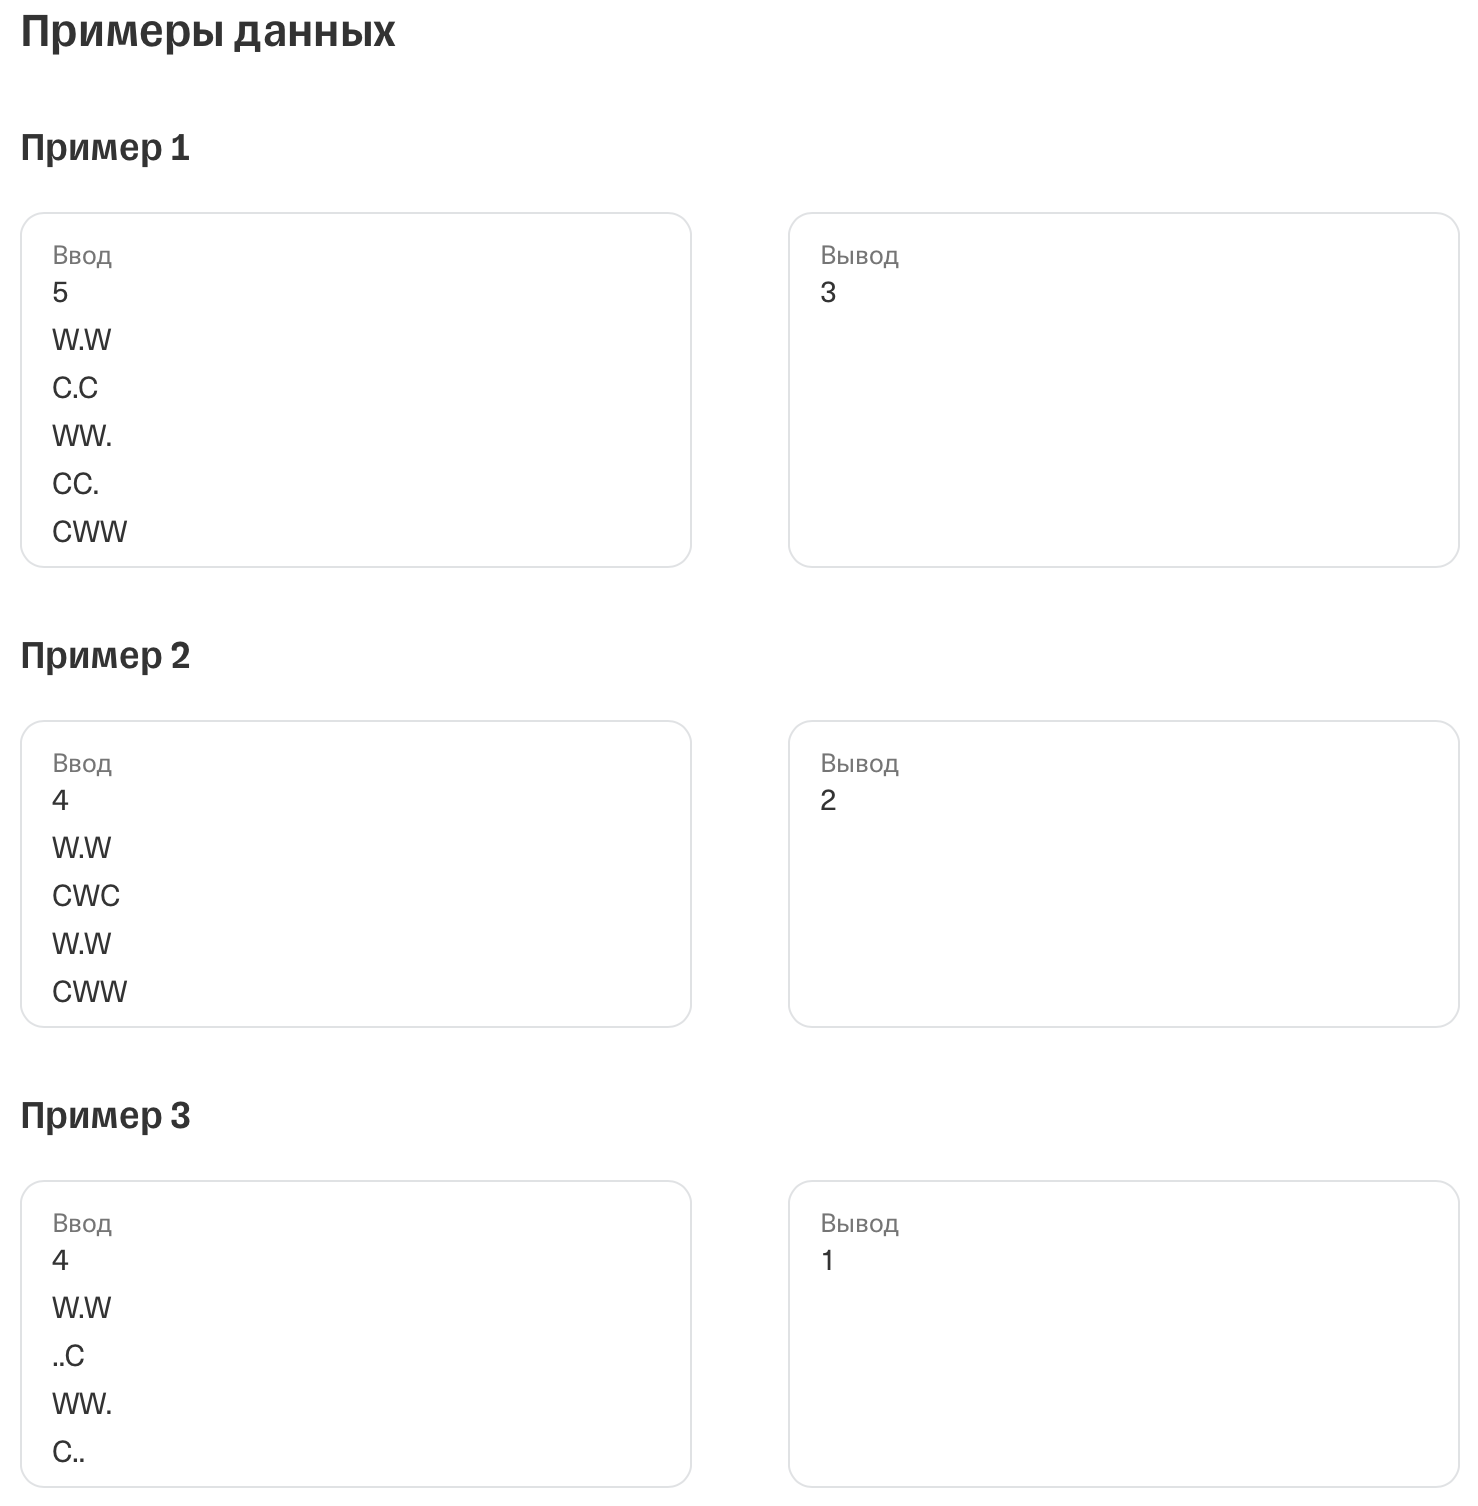

In [201]:
def mapper(st: str) -> list[int]:
    switcher = {
        '.': 0,
        'W': -1,
        'C': 1
    }
    return [switcher[s] for s in st]

rows = int(input())
forrest = [mapper(input()) for _ in range(rows)]

maximum = maximum = max(max(forrest[0]), 0)
for i in range(rows - 1):
    for j in range(3):
        if forrest[i+1][j] == -1 or max(forrest[i][max(0, j-1):min(j+2, 3)]) == -1:
            forrest[i+1][j] = -1
            continue
        forrest[i+1][j] += max(forrest[i][max(0, j-1):min(j+2, 3)])
    if max(forrest[i+1]) == -1:
        break
    else:
        maximum = max(forrest[i+1])
print(maximum)

 7
 WCW
 CWC
 ..C
 ..C
 W.W
 .WW
 ..C


4


In [ ]:
5
W.W
C.C
WW.
CC.
CWW

In [ ]:
4
W.W
CWC
W.W
CWW

# Задание 6

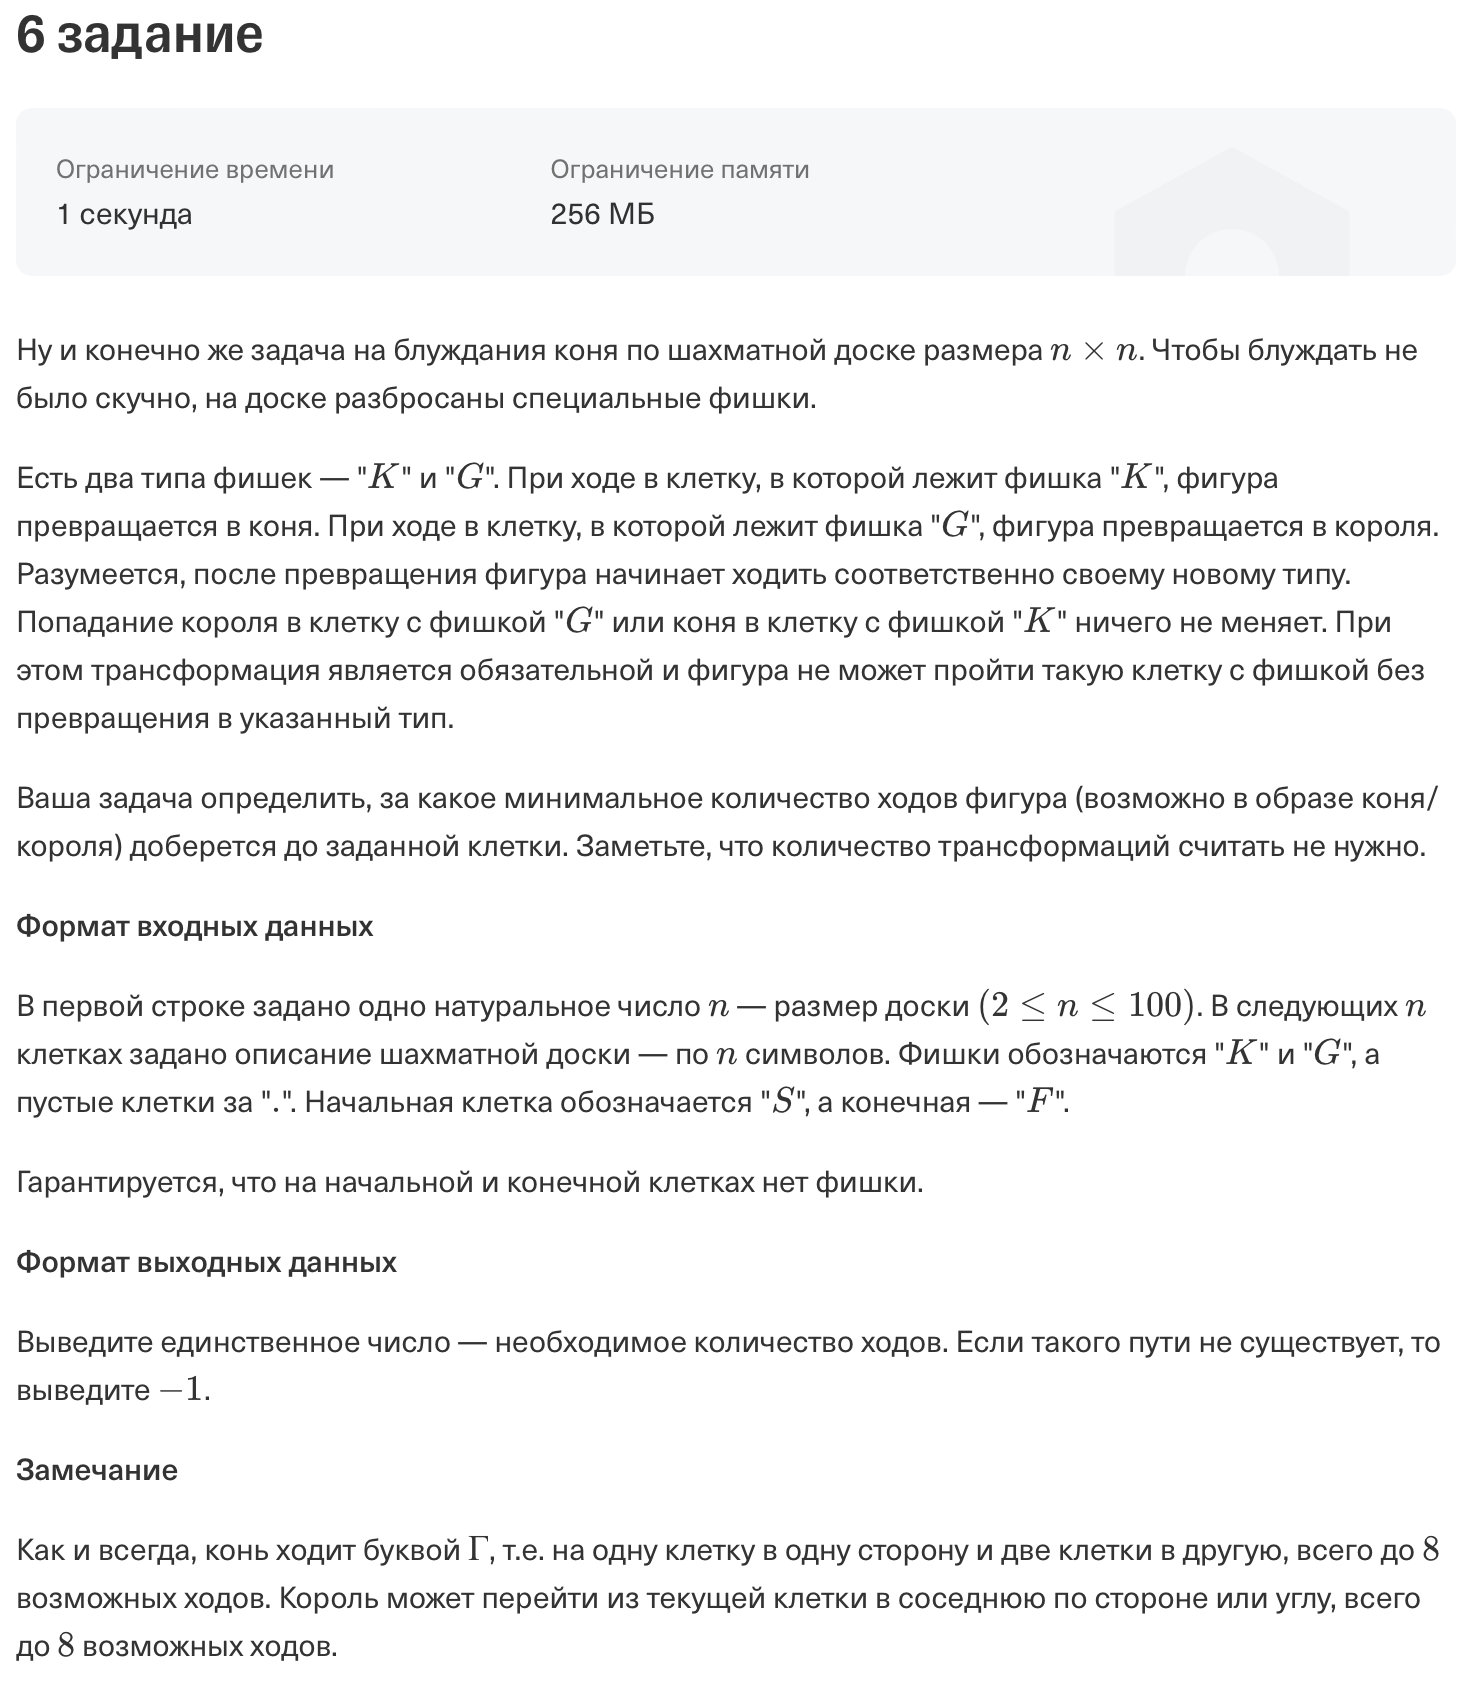

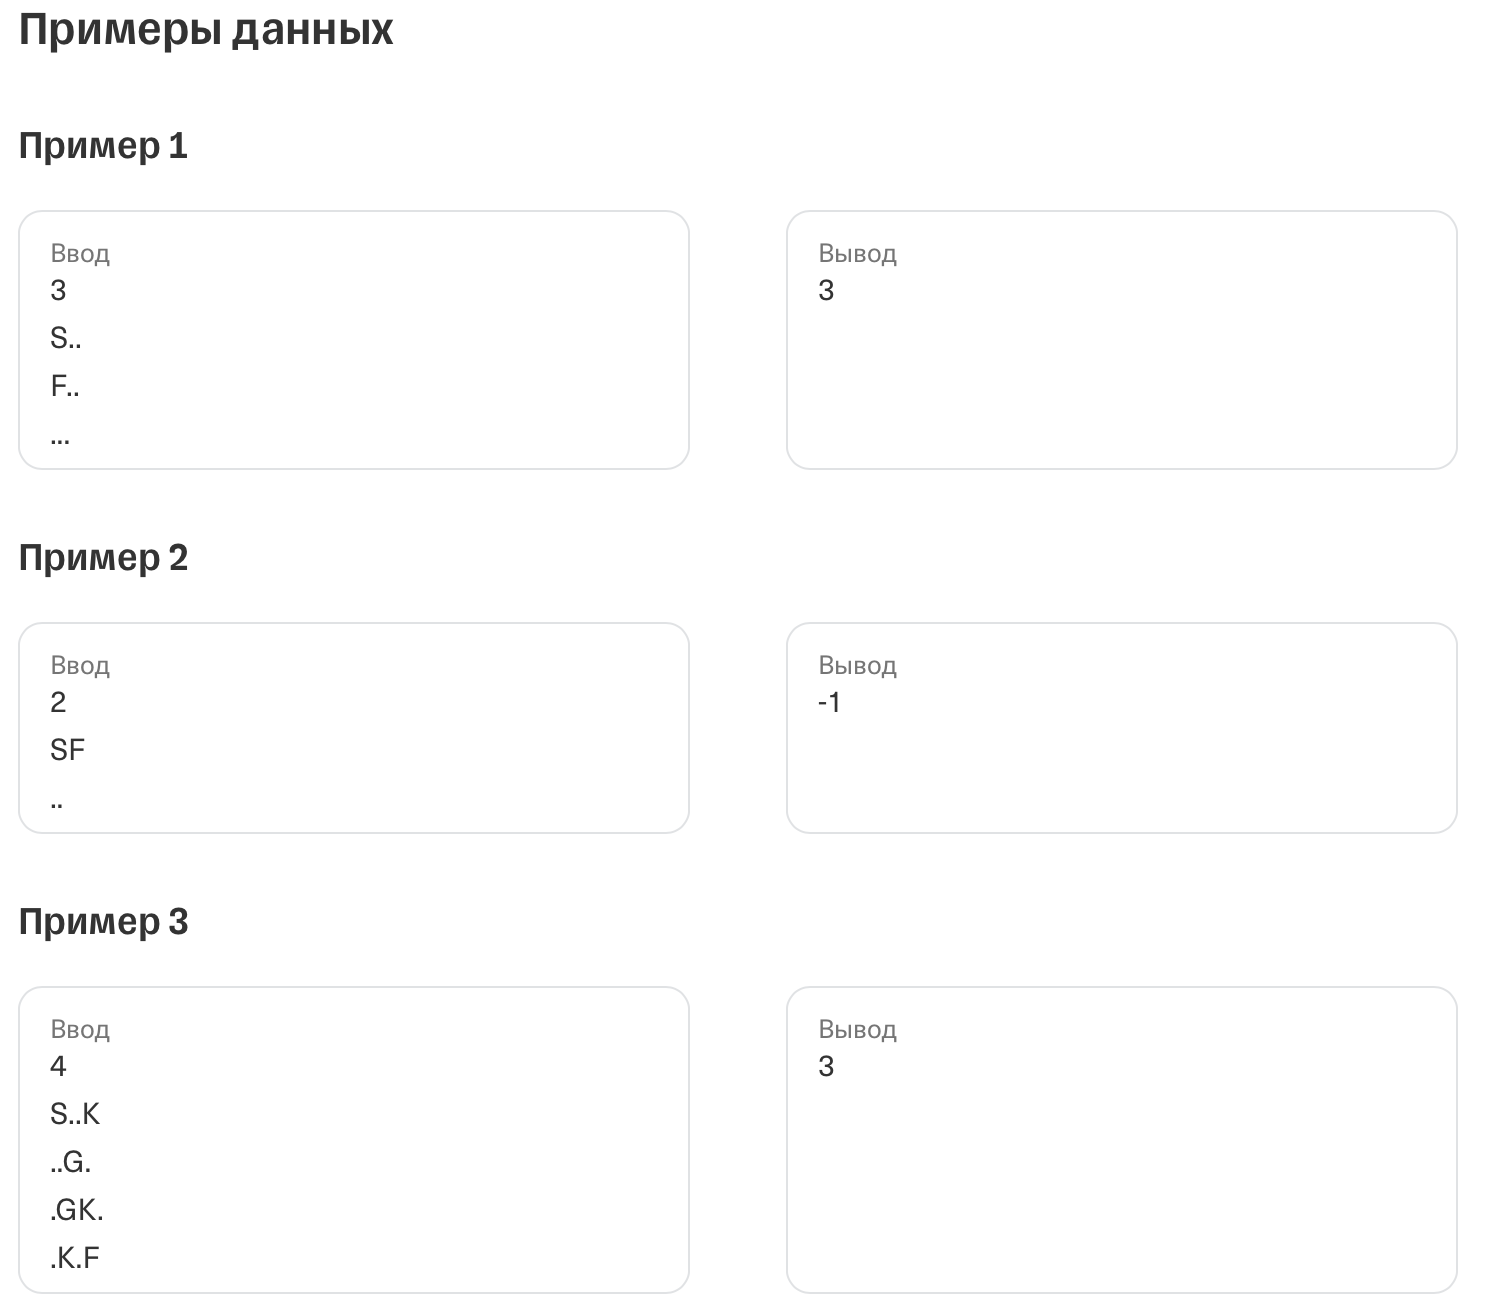

In [178]:
knight_moves = [[-2, -1], [-2, 1], [2, -1], [2, 1], [-1, -2], [1, -2], [-1, 2], [1, 2]]
king_moves   = [[-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, -1]]

def move_figures(figures, real_desc, kght_desc, king_desc, n):
    new_figures = []
    for fig in figures:
        if fig[0] == 'knight':
            for mv in knight_moves:
                ind_i, ind_j = fig[1] + mv[0], fig[2] + mv[1]
                if ind_i < 0 or ind_i >= n or ind_j < 0 or ind_j >= n:
                    continue
                
                if real_desc[ind_i][ind_j] == 'F':
                    print(fig[3] + 1)
                    return None
                
                if not kght_desc[ind_i][ind_j]:
                    kght_desc[ind_i][ind_j] = True
                    new_figures.append((
                        'knight' if real_desc[ind_i][ind_j] != 'G' else 'king',   # change type of figure
                        ind_i, ind_j,                                             # new position
                        fig[3] + 1                                                # new lenght of path
                    ))
        elif fig[0] == 'king':
            for mv in king_moves:
                ind_i, ind_j = fig[1] + mv[0], fig[2] + mv[1]
                if ind_i < 0 or ind_i >= n or ind_j < 0 or ind_j >= n:
                    continue

                if real_desc[ind_i][ind_j] == 'F':
                    print(fig[3] + 1)
                    return None
                
                if not king_desc[ind_i][ind_j]:
                    king_desc[ind_i][ind_j] = True
                    new_figures.append((
                        'king' if real_desc[ind_i][ind_j] != 'K' else 'knight',   # change type of figure
                        ind_i, ind_j,                                             # new position
                        fig[3] + 1                                                # new lenght of path
                    ))
    return new_figures
            

n = int(input())
real_desc = [[letter for letter in input()] for _ in range(n)]
kght_desc = [[False for j in range(n)] for i in range(n)]
king_desc = [[False for j in range(n)] for i in range(n)]

start_i, start_j = None, None
for i in range(n):
    for j in range(n):
        if real_desc[i][j] == 'S':
            start_i, start_j = i, j
kght_desc[start_i][start_j] = True
figures = [('knight', start_i, start_j, 0)]
while figures:
    figures = move_figures(figures, real_desc, kght_desc, king_desc, n)
    if figures is None:
        break
        
if figures is not None:
    print(-1)

 2
 SF
 ..


-1


In [ ]:
4
S..K
..G.
.GK.
.K.F